세번째 작업 - total train 얻기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 일관성 유지, 대부분의 데이터 분석 도구는 YYYY-MM-DD 형식으로 표시된 날짜를 지원, 데이터 분석을 보다 쉽게 수행할 수 있도록 하는 것
date_parsering = lambda date: pd.to_datetime(date, format='%d.%m.%Y')

train = pd.read_csv('../data/sales_train.csv', parse_dates=['date'], date_parser=date_parsering)

In [ ]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [ ]:
train.info(show_counts=True)

# date의 타입변환 확인
# 전체 데이터: 2,935,849개, 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            2935849 non-null  datetime64[ns]
 1   date_block_num  2935849 non-null  int64         
 2   shop_id         2935849 non-null  int64         
 3   item_id         2935849 non-null  int64         
 4   item_price      2935849 non-null  float64       
 5   item_cnt_day    2935849 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [ ]:
# 결측치 확인

print(train.isnull().sum())

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


In [ ]:
# 중복값 확인

print(f"중복 제거: {train.duplicated().sum()}개 ")
train = train.drop_duplicates()
train.head()

중복 제거: 6개 


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


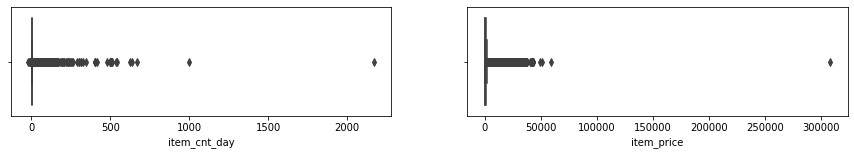

In [ ]:
# 일별 판매량, 상품 가격 시각화

fig, axes = plt.subplots(1,2, figsize = (15,2))
sns.boxplot(x=train.item_cnt_day, ax=axes[0])
sns.boxplot(x=train.item_price, ax=axes[1])

In [ ]:
# 이상치 제거

train = train[train['item_cnt_day'] < 1000]
train = train[train['item_price'] < 300000]

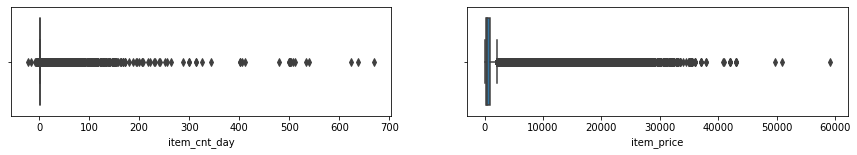

In [ ]:
# 이상치 제거 후, 데이터 시각화

fig, axes = plt.subplots(1,2, figsize = (15,2))
sns.boxplot(x=train.item_cnt_day, ax=axes[0])
sns.boxplot(x=train.item_price, ax=axes[1])

In [ ]:
# 상품가격 음수인 데이터 확인

train[train['item_price'] == -1]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,2013-05-15,4,32,2973,-1.0,1.0


In [ ]:
train[train['item_id'] == 2973].head(5)
# shop_id 32만 해당

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
352,2013-01-15,0,25,2973,2499.0,13.0
353,2013-01-16,0,25,2973,2499.0,5.0
354,2013-01-17,0,25,2973,2499.0,3.0
355,2013-01-18,0,25,2973,2499.0,2.0
356,2013-01-19,0,25,2973,2499.0,3.0


In [ ]:
price_trans = train[(train['shop_id'] == 32) & (train['item_id'] == 2973) & (train['date_block_num'] == 4) & (train['item_price'] > 0)].item_price.median()
train.loc[train['item_price'] < 0, 'item_price'] = price_trans
train[train['item_price'] == -1]


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


In [ ]:
# shop_id와 shop_name 0을 57에 맞춰 변경
train['shop_id'] = train['shop_id'].replace(0, 57)

# shop_id와 shop_name 1을 58에 맞춰 변경
train['shop_id'] = train['shop_id'].replace(1, 58)

# shop_id와 shop_name 11을 10에 맞춰 변경
train['shop_id'] = train['shop_id'].replace(11, 10)

# shop_id와 shop_name 40을 39에 맞춰 변경
train['shop_id'] = train['shop_id'].replace(40, 39)

In [ ]:
# 같은 곳으로 변경되면서 중복된 부분 처리

train.drop_duplicates()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [ ]:
pre_train = train.drop_duplicates()

In [ ]:
# 중복 처리 후, shop_id 개수 확인

pre_train['shop_id'].nunique()

56

In [ ]:
pre_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [ ]:
pre_train.to_csv("../pre_data/pre_train.csv")